*SIO221a Notes - Alford and Gille*

*Reading:  Bendat and Piersol, Ch. 10.2 (especially Ch. 10.2.3)*

Concepts covered: Aliasing

## Lecture 14

*Recap*

So far this class has looked at methods for computing spectra and assigning
uncertainties, and we've identified the
the lowest resolved frequency and the Nyquist frequency (the highest frequency
for which we have any information.)  This brings us to spectral resolution and
aliasing.

#### Spectral resolution

Suppose I have 1000 points collected over 1 day.  Will I be able to tell the
difference between the M2 (12.42 h) and solar semi-diurnal S2 (12 h) tides?
What are the frequencies of these peaks?
For M2, we have 24 h/12.42 h/1000 = 1.9324 cycles/1000 pts = 0.0019 cycles/measurement.
For  S2, we have 24 h/12 h/1000 = 2 cycles/1000 pts = 0.0020 cycles/measurement.

The lowest frequency we can measure is 1 cycle/1000 points, and we count
by integers:  2 cycles/1000 points, 3 cycles/1000 points, etc.  So can we
distinguish these peaks?  How many measurements would we need, or how long
a measurement period, to separate M2 and S2?  Can we measure more frequently
to separate M2 and S2?
More density won't do the trick.   We definitely need a longer time series.

So how long a record do we need?  To separate two frequencies, we require
that our frequency resolution ($=T^{-1}$)  be greater than the separation between the two frequencies we are hoping to distinguish.  So to separate
12.42 h and 12 h, what does that require?  We need to be able to separate
1.9324 cycles/day from 2 cycles/day.  The frequency separation $\Delta f$
is 0.0676 cycles/day.  So

$$
T= \frac{1}{\Delta f} = \frac{1}{2-1.9324} = 14.79 \mbox{ days}.
$$

While physically very real, this is a simple aspect of trig identities:
$$
\sin(2\pi(f+\Delta f/2)) + \sin (2\pi(f-\Delta f/2))
$$

$$
=2\sin(2\pi f) \cos(2\pi\Delta f)
$$

The two nearby sine waves "beat" to contructively interfere, with a period of $T_{beat}=(f-\Delta f)^{-1}$.  (Surfers and beachgoers: this is also why surface waves appear in groups...).


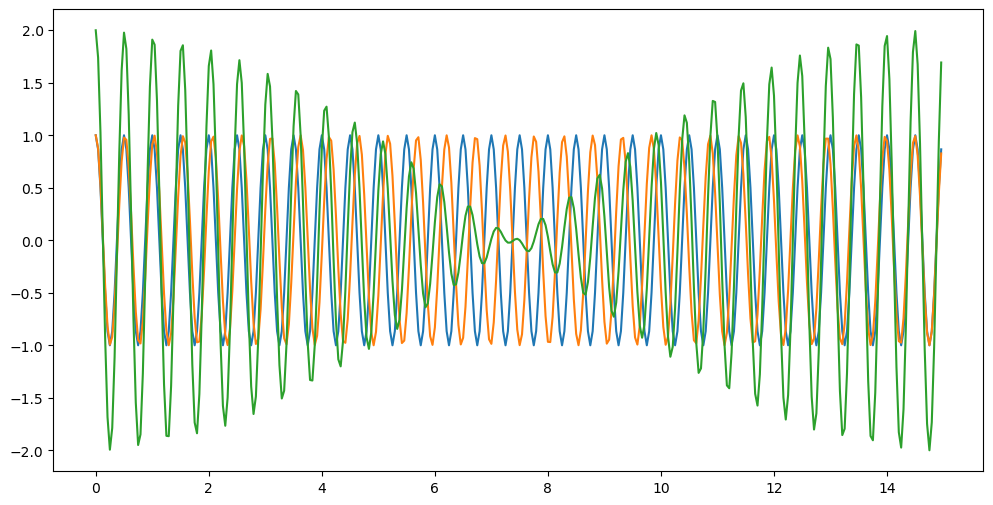

In [2]:
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(0,15*24,1)

P1=24/2;
P2=12.42;
plt.figure(figsize=(12,6))
plt.plot(time/24, np.cos(time*2*np.pi/P1), label="S2") 
plt.plot(time/24, np.cos(time*2*np.pi/P2), label="M2") 
plt.plot(time/24, np.cos(time*2*np.pi/P1)+np.cos(time*2*np.pi/P2), label="M2+S2") 


#### A thought experiment.

First, as a class: if I want to have information on a frequency $f_o$, what's the minimum sample interval I'd need?

Next, let's first spend about 20 minutes thinking about a few questions in groups.  You can use your brains and/or MATLAB/Python.

1. Based on our pier tour, we learned that the temperature is sampled once a day (say for this exercise it's at 4PM).  Let's also say that the ocean has a constant temperature of 15C, but has a diurnal cycle with an amplitude of 2C with a maximum at 4 PM.

2. Imagine now that the real temperature is 15C but has a tidal amplitude of 2C, with a period of 12.4 hours.

Suppose that every day at noon you go to the end of the Scripps Pier to make
a temperature measurement.   After a year or so, you could plot
a time series that would show the increase in temperature in summer and decrease in winter.  But since
you made your measurements at noon, the mean temperature might be quite a bit larger than the true mean.
You would have "aliased" the diurnal cycle into the time-averaged mean.  In this case, it would be easy to remedy
the problem by measuring a few times a day.  But if you rely on busy volunteers
to collect your measurements, or if the measurements have already been collected and archived, you
might not be able to eliminate aliasing after the fact.

Here's another example.  Suppose you collect measurements off the Scripps pier, where you expect a strong M2 (12.42 hour) tidal signal.  But for (inscrutable) reasons your sensors have been set to collect data every 9 hours.  Can you detect the M2 tide?

We'll want to think this through carefully.  If you have an 12-hour
oscillation, then based on our understanding of the Nyquist frequency,
you would need measurements every 6 hours to say anything about the tide (and
of course we'd like to do better than that to have useful information about
phasing.)   So imagine drawing a 12-hour oscillation and sampling it at 9-hour increments.  What does the 12-hour signal look like when viewed at 9-hour
increments?  What frequency will it appear to have?

This is the basic concept of  *aliasing*.  When a signal is aliased, it is
identified at the wrong frequency because of sampling limitations.

This leads us to a few important questions:

1. How do we tell how a given frequency will be aliased?
2. Can we use aliasing to our advantage?  When can it serve as a feature rather than a bug?
3. Why does aliasing mean that we should worry about aliasing of white and blue noise?

#### How does aliasing shift frequencies?

In the case where we measure a 12-hour oscillation at 9-hour increments,
the Nyquist frequency of our measurements was 1 cycle per 18 hours.  If we
had 15 days of data (so 40 measurements), we would measure frequencies
of $f_1 = 1/15$ cpd $=0.0667$ cpd, $2f_1, 3f_1, 4f_1, ... $ up to the Nyquist frequency, which is 20 cycles/15 days $=20f$.  The 12-hour oscillation has 30 cycles in 15 days,
so should be $30f$.

In the discrete Fourier transform, we're not able to tell
the difference between $20f + 10f$ and $20f - 10f$.   To think about this, we need to think
about the discarded second half of the Fourier transform---the
frequencies beyond the Nyquist frequency.  Sometimes we think of these
as the negative frequency counterparts to the positive frequencies that we plot,
so we'll represent the Fourier time series as frequencies from 0 to the
Nyquist frequency followed by frequencies from the negative Nyquist frequency  back to zero:  $0f, 1f, 2f, 3f, .... N/2 f, (-N/2+1)f, (-N/2+2)f, ... -3f, -2f, -1f$
In the complex plane, this is like representing angles from 0 to $\pi$
followed by angles from $-\pi$ to 0.  But keep in mind that that for this
purpose, $2\pi-\Delta$ is equivalent to $-\Delta$.  In other words:
$e^{i(2\pi-\Delta)}=e^{-i\Delta}$.

This means that instead of thinking of the frequencies beyond the Nyquist
frequency as the negative frequency counterparts to the frequencies that
we plot, we can also think of them
as positive frequencies beyond the Nyquist frequency: $0f, 1f, 2f, 3f, .... N/2 f, (N/2+1)f, (N/2+2)f, ... (N-3)f, (N-2)f, (N-1)f$.

One way to think about the Fourier transform
at frequency $f_{Ny}-\Delta$ is that it represents the collective
amplitudes of $f_{Ny}-\Delta$ and $f_{Ny}+\Delta$ plus all the other possible
aliased frequencies (e.g. $Nf+f_{Ny}-\Delta$, $Nf+f_{Ny}+\Delta$, and so
forth.)

So coming back to our thought experiment, with 9-hour sampling, and a 12-hour
oscillation.  The Nyquist frequency was 20 cycles per 15 days or $f_{Ny}=20f$, and the
frequency of the 12-hour oscillation was 30 cycles per 15 days or $30f = f_{Ny}+10f$.  This will alias into its counterpart $f_{Ny}-10f = 10f$ which in this case is 10 cycles per 15 days or 36 hours, as illustrated in Figure 1.

Text(0, 0.5, 'Amplitude')

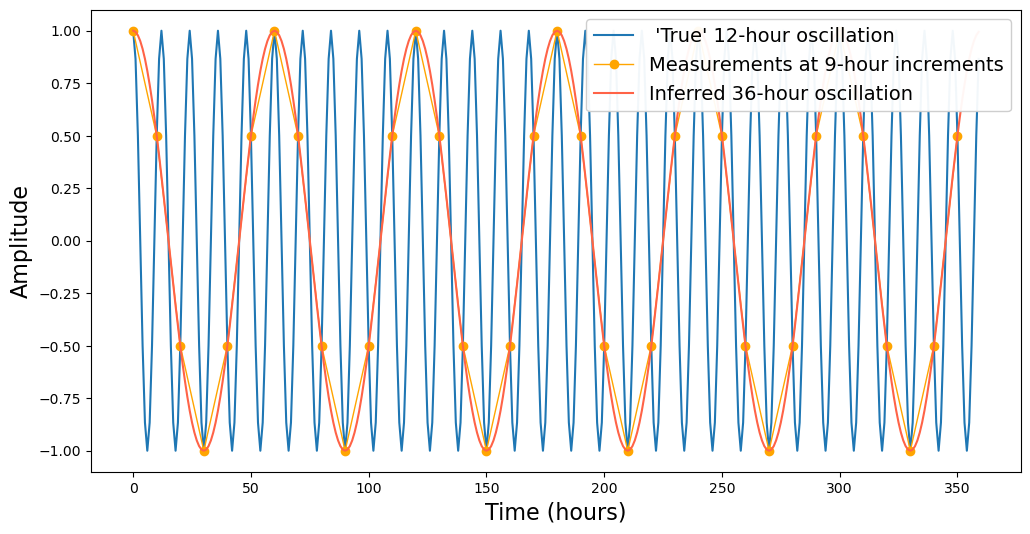

In [9]:
time = np.arange(0,15*24, 10)
time_dense = np.arange(0, 15*24)

plt.figure(figsize=(12,6))
plt.plot(time_dense, np.cos(time_dense*2*np.pi/12), label=" 'True' 12-hour oscillation") 
plt.plot(time, np.cos(time*2*np.pi/12), 'o-', color='orange', lw=1, label='Measurements at 9-hour increments')
plt.plot(time_dense, np.cos(time_dense*2*np.pi/60), '-', color='tomato', label='Inferred 36-hour oscillation')
plt.legend(loc=1, fontsize=14, framealpha=0.95)
plt.xlabel('Time (hours)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

There's a simple rule for determining alias frequencies.  Take the frequency
of the
true signal minus the Nyquist frequency, and subtract that from the Nyquist frequency.   So if I measure at 1 Hz, I have a Nyquist frequency of 1 cycle per 2 seconds.  If I want to know what happens to a signal with a frequency of
1 cycle/1.1 seconds, I can figure it out this way.  For the frequency $f_{true}$ = 1 cycle/1.1 seconds = 10 cycles/11 seconds, with a Nyquist frequency of
5.5 cycles/11 seconds,  then the difference will be (10-5.5)cycles/11 seconds = 4.5 cycles/11 seconds, so the resulting alias will be $f_{alias}$ = (5.5-4.5)cycles/11 seconds = 1 cycle/11 seconds.

So now you can test yourself.  What are the alias frequencies for the
following:

1. A 12-hour oscillation is sampled every 10 hours?
2. A 12-hour oscillation is sampled every 15 hours?
3. A 12.4 hour oscillation is sampled every 9.9 days?

The first of these cases is straightforward, but the second two cases are
tricky because the aliased frequencies fold back and forth across resolved
range of frequencies.  Here's a basic algorithm.

1. Compute the Nyquist frequency and the frequency of the signal that might be aliased.
2. Compute the ratio:  $f_{signal}/f_{Ny}$ and truncate this to be a whole integer $M$ less than or equal to the ratio.
3. If $M$ is odd, then we're folding down relative to the Nyquist frequency. $\Delta = f_{signal}-Mf_{Ny}$, and $f_{alias}=f_{Ny}-\Delta$.
4. If $M$ is even, then we're folding up relative to frequency zero. $\Delta = f_{signal}-Mf_{Ny}$, and $f_{alias}=\Delta$.

By this rule, the 12-hour oscillation sampled at 15-hour intervals aliases to
60 hours.

#### Using aliasing strategically

Finally, let's look at a very real world example.  The TOPEX/Poseidon/Jason altimeters pass over the same ground
tracks every 9.9156 days.  Sea surface height is strongly influenced by the M2 tide, which has a period of
12.4206 hours.  What frequency does 12.4206 hours alias into?  In this case, the altimeter Nyquist frequency is
nowhere near the tidal frequency, and the aliased signal folds back and forth along the x-axis several times.  To
compute this, we first need to compute frequencies in common units:

In [3]:
# cycles per day
f_sampling = 1/(9.9156)  
# cycles per day
f_M2 = 24/12.4206
f_Nyquist = f_sampling/2
#compute the integer ratio of the two frequencies. In examples above, this was one.
M = np.floor(f_M2/f_Nyquist) 
alias = f_M2 - np.floor(f_M2/f_Nyquist)*f_Nyquist
print('M = %s'%M)
print(1/alias)

#Note: if M is odd then reset
if M%2!=0:
    alias = f_Nyquist-alias

M = 38.0
62.10675812405408


This calculation shows that $M$ is 38 and the tidal energy aliases into a 62.1068 day period.  Note that
if $M$ is odd, you have to do the calculation slightly differently.  As an exercise, you can check what
happens if you round of the numbers and use 9.9 for the altimeter sampling frequency and 12.4 for the tidal
cycle.

This is a nice illustration that if you understand how aliasing works, and
what the dominant energy might be, you can use the aliasing strategically
to infer a signal from sparsely sampled data.

Although the M2 tide (and internal tide) from the TOPEX/Poseidon/Jason
altimeter series are one of the clearest examples, this comes up in other
cases too.

#### What does aliasing mean for noise at the high frequency end of the spectrum?

Finally, think about this scenario.  Suppose we have a spectrum that is
basically red, like most geophysical spectra, but at high frequencies
or wavenumber, it is white.  Unfortunately we don't fully sample the
high frequencies.  What happens to the energy beyond the Nyquist frequency?

This unsampled high frequency energy will alias in to our signal.  (Imagine
folding it over on our resolved spectrum.)

#### Oversampling and Anti-alias filters
The term oversampling should be mentioned in the context of aliasing.
It's used in a couple different ways (see
Wikipedia).  One meaning is just the concept of sampling at a much higher rate
than the Nyquist frequency.  That's obviously a good way to reduce aliasing
and improve peak resolution.  The second meaning is used for digitial-to-analog
conversion and involves resampling information at a higher frequency than the
Nyquist frequency of the original digital signal.  When converted to analog,
this oversampling process introduces some
aliased or reflected signals that are subsequently filtered out.

#### Space/time aliasing

As an introduction to our treatment soon of wavenumber-frequency spectra, we sometimes have data that spans time and space.  Because most such measurements rely on vehicles (such as ships) that are sampling some ocean quantity $q(x,t)$ by traveling through it at $x_{sensor}(t)$, we sample $q(x(t),t)$ - and if the vehicle is not moving fast compared to the ocean we can get a variety of effects.  One is space-time aliasing, where we will show a simple example of a ship sampling an ocean tidal channel with no spatial structure. If we take a large fraction of a tidal period to transit the channel, we can infer spatial structure where none was actually present - *aliasing.*

#### Data Analysis Grammar interlude (or how to use English gammar rules to sound like you know what you're talking about)

"Data" and "spectra" are latin plural words for "Datum" and "Spectrum." Hence, it's always wrong to say "The data is..." and "The spectra is..."  

Incorrect: "The data is plotted in Figure 2 - and the spectra is plotted in Figure 3."

Correct: "The data show a spread, as the spectrum verifies."



